In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2

#data path 수정
os.chdir("C:\\Users\\Owner2\\Desktop\\G팔로미_vuno")
os.getcwd()

'C:\\Users\\Owner2\\Desktop\\G팔로미_vuno'

In [3]:
X=np.load('data_X.npy')
y=np.load('data_y.npy')

In [4]:
#train, validation set 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    ##featurewise_center=True,
    #featurewise_std_normalization=True, 
    rotation_range=25.0,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True) #수평방향 뒤집기

datagen.fit(X_train)

dgf=datagen.flow(X_train,y_train,batch_size=64)

Using TensorFlow backend.


In [6]:
from keras import layers, models
from keras.applications import VGG16
from keras import Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
 


input_tensor = Input(shape=(224, 224, 3), dtype='float32', name='input')
 
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(input_tensor)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Flatten()(x)
x = layers.Dense(4096, kernel_initializer='he_normal')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(2048, kernel_initializer='he_normal')(x)
x = layers.Dense(1024, kernel_initializer='he_normal')(x)
x = layers.Dense(512, kernel_initializer='he_normal')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(264, kernel_initializer='he_normal')(x)
output_tensor = layers.Dense(4, activation='softmax')(x)
 
myvgg = Model(input_tensor, output_tensor)
myvgg.summary()

W0604 13:53:40.272425 14236 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0604 13:53:40.291999 14236 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0604 13:53:40.293010 14236 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0604 13:53:40.331020 14236 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0604 13:53:40.5

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
__________

In [7]:
# checkpoint = ModelCheckpoint(filepath='My_VGG_{epoch:03d}_{val_loss:.7f}.hdf5',monitor='loss', mode='min', save_best_only=True)
checkpoint = ModelCheckpoint(filepath='My_VGG_weight_4.hdf5', 
            monitor='loss', 
            mode='min', 
            save_best_only=True)

In [8]:
from keras import backend as K
import tensorflow as tf

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [9]:
myvgg.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy', auc, precision, recall, f1score])

W0604 13:54:38.253296 14236 deprecation_wrapper.py:119] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0604 13:54:38.349557 14236 deprecation.py:323] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\tensorflow\python\ops\metrics_impl.py:809: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [10]:
X.shape

(2861, 224, 224, 3)

In [11]:
# history1=myvgg.fit(X,y,batch_size=32,
#                   epochs=100,
#                   validation_split=0.3,
#                   callbacks=[checkpoint])

In [12]:
history = myvgg.fit_generator(dgf, 
            steps_per_epoch=100, 
            epochs=300, 
            validation_data=(X_val,y_val), 
            validation_steps=16, 
            callbacks=[checkpoint])

W0604 13:54:52.348991 14236 deprecation.py:323] From C:\Users\Owner2\Anaconda3\envs\keras2\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/300
100/100 [==============================] - 63s 633ms/step - loss: 86.7691 - acc: 0.3770 - auc: 0.5467 - precision: 0.4127 - recall: 0.3016 - f1score: 0.3435 - val_loss: 82.6399 - val_acc: 0.5332 - val_auc: 0.6249 - val_precision: 0.6417 - val_recall: 0.3562 - val_f1score: 0.4570
Epoch 2/300
100/100 [==============================] - 52s 524ms/step - loss: 81.3189 - acc: 0.4959 - auc: 0.6714 - precision: 0.5657 - recall: 0.3516 - f1score: 0.4304 - val_loss: 79.6685 - val_acc: 0.5192 - val_auc: 0.7055 - val_precision: 0.6257 - val_recall: 0.4040 - val_f1score: 0.4904
Epoch 3/300
100/100 [==============================] - 54s 544ms/step - loss: 78.2809 - acc: 0.5149 - auc: 0.7262 - precision: 0.5902 - recall: 0.3861 - f1score: 0.4644 - val_loss: 76.7093 - val_acc: 0.5367 - val_auc: 0.7440 - val_precision: 0.5806 - val_recall: 0.4610 - val_f1score: 0.5134
Epoch 4/300
100/100 [==============================] - 54s 540ms/step - loss: 75.2654 - acc: 0.5309 - auc: 0.7565 - precisio

Epoch 29/300
100/100 [==============================] - 55s 551ms/step - loss: 29.4303 - acc: 0.6276 - auc: 0.8663 - precision: 0.6445 - recall: 0.5944 - f1score: 0.6182 - val_loss: 28.9396 - val_acc: 0.6228 - val_auc: 0.8669 - val_precision: 0.6348 - val_recall: 0.5949 - val_f1score: 0.6141
Epoch 30/300
100/100 [==============================] - 55s 553ms/step - loss: 28.5244 - acc: 0.6242 - auc: 0.8674 - precision: 0.6436 - recall: 0.5877 - f1score: 0.6141 - val_loss: 28.0525 - val_acc: 0.6263 - val_auc: 0.8680 - val_precision: 0.6391 - val_recall: 0.6042 - val_f1score: 0.6211
Epoch 31/300
100/100 [==============================] - 55s 554ms/step - loss: 27.6780 - acc: 0.6322 - auc: 0.8685 - precision: 0.6502 - recall: 0.6007 - f1score: 0.6242 - val_loss: 27.3613 - val_acc: 0.5984 - val_auc: 0.8691 - val_precision: 0.6118 - val_recall: 0.5832 - val_f1score: 0.5971
Epoch 32/300
100/100 [==============================] - 55s 554ms/step - loss: 26.8741 - acc: 0.6389 - auc: 0.8695 - prec

Epoch 57/300
100/100 [==============================] - 55s 549ms/step - loss: 15.4111 - acc: 0.6629 - auc: 0.8862 - precision: 0.6713 - recall: 0.6476 - f1score: 0.6591 - val_loss: 15.3285 - val_acc: 0.6310 - val_auc: 0.8865 - val_precision: 0.6371 - val_recall: 0.6228 - val_f1score: 0.6298
Epoch 58/300
100/100 [==============================] - 55s 555ms/step - loss: 15.1642 - acc: 0.6649 - auc: 0.8867 - precision: 0.6766 - recall: 0.6461 - f1score: 0.6608 - val_loss: 15.1161 - val_acc: 0.6065 - val_auc: 0.8869 - val_precision: 0.6107 - val_recall: 0.5902 - val_f1score: 0.6002
Epoch 59/300
100/100 [==============================] - 56s 556ms/step - loss: 14.9251 - acc: 0.6647 - auc: 0.8871 - precision: 0.6732 - recall: 0.6502 - f1score: 0.6613 - val_loss: 14.8403 - val_acc: 0.6147 - val_auc: 0.8874 - val_precision: 0.6192 - val_recall: 0.6042 - val_f1score: 0.6116
Epoch 60/300
100/100 [==============================] - 56s 558ms/step - loss: 14.6841 - acc: 0.6714 - auc: 0.8876 - prec

Epoch 85/300
100/100 [==============================] - 56s 556ms/step - loss: 10.6583 - acc: 0.6850 - auc: 0.8960 - precision: 0.6925 - recall: 0.6717 - f1score: 0.6817 - val_loss: 10.7708 - val_acc: 0.6077 - val_auc: 0.8961 - val_precision: 0.6182 - val_recall: 0.5949 - val_f1score: 0.6062
Epoch 86/300
100/100 [==============================] - 56s 556ms/step - loss: 10.5463 - acc: 0.6962 - auc: 0.8963 - precision: 0.7031 - recall: 0.6860 - f1score: 0.6944 - val_loss: 10.6433 - val_acc: 0.6228 - val_auc: 0.8964 - val_precision: 0.6274 - val_recall: 0.6077 - val_f1score: 0.6173
Epoch 87/300
100/100 [==============================] - 56s 556ms/step - loss: 10.4341 - acc: 0.7000 - auc: 0.8966 - precision: 0.7070 - recall: 0.6896 - f1score: 0.6981 - val_loss: 10.5596 - val_acc: 0.6042 - val_auc: 0.8967 - val_precision: 0.6118 - val_recall: 0.5937 - val_f1score: 0.6025
Epoch 88/300
100/100 [==============================] - 56s 555ms/step - loss: 10.3267 - acc: 0.6926 - auc: 0.8969 - prec

100/100 [==============================] - 55s 549ms/step - loss: 8.3639 - acc: 0.7099 - auc: 0.9030 - precision: 0.7159 - recall: 0.7027 - f1score: 0.7092 - val_loss: 8.4791 - val_acc: 0.6112 - val_auc: 0.9031 - val_precision: 0.6173 - val_recall: 0.6088 - val_f1score: 0.6130
Epoch 114/300
100/100 [==============================] - 55s 553ms/step - loss: 8.3124 - acc: 0.7174 - auc: 0.9032 - precision: 0.7225 - recall: 0.7097 - f1score: 0.7160 - val_loss: 8.4152 - val_acc: 0.5960 - val_auc: 0.9034 - val_precision: 0.6002 - val_recall: 0.5937 - val_f1score: 0.5969
Epoch 115/300
100/100 [==============================] - 56s 555ms/step - loss: 8.2536 - acc: 0.7126 - auc: 0.9035 - precision: 0.7168 - recall: 0.7027 - f1score: 0.7096 - val_loss: 8.5198 - val_acc: 0.5960 - val_auc: 0.9036 - val_precision: 0.6017 - val_recall: 0.5902 - val_f1score: 0.5959
Epoch 116/300
100/100 [==============================] - 55s 552ms/step - loss: 8.1959 - acc: 0.7220 - auc: 0.9037 - precision: 0.7284 - r

100/100 [==============================] - 55s 551ms/step - loss: 7.0308 - acc: 0.7335 - auc: 0.9089 - precision: 0.7370 - recall: 0.7269 - f1score: 0.7319 - val_loss: 7.2562 - val_acc: 0.6100 - val_auc: 0.9090 - val_precision: 0.6149 - val_recall: 0.6019 - val_f1score: 0.6083
Epoch 142/300
100/100 [==============================] - 55s 552ms/step - loss: 6.9888 - acc: 0.7373 - auc: 0.9091 - precision: 0.7416 - recall: 0.7303 - f1score: 0.7359 - val_loss: 7.2245 - val_acc: 0.6158 - val_auc: 0.9092 - val_precision: 0.6210 - val_recall: 0.6123 - val_f1score: 0.6166
Epoch 143/300
100/100 [==============================] - 55s 552ms/step - loss: 6.9595 - acc: 0.7304 - auc: 0.9093 - precision: 0.7358 - recall: 0.7245 - f1score: 0.7301 - val_loss: 7.1817 - val_acc: 0.5960 - val_auc: 0.9094 - val_precision: 0.6045 - val_recall: 0.5879 - val_f1score: 0.5960
Epoch 144/300
100/100 [==============================] - 56s 556ms/step - loss: 6.9223 - acc: 0.7299 - auc: 0.9095 - precision: 0.7349 - r

100/100 [==============================] - 55s 546ms/step - loss: 6.1409 - acc: 0.7637 - auc: 0.9142 - precision: 0.7670 - recall: 0.7592 - f1score: 0.7631 - val_loss: 6.4116 - val_acc: 0.6240 - val_auc: 0.9143 - val_precision: 0.6296 - val_recall: 0.6217 - val_f1score: 0.6255
Epoch 170/300
100/100 [==============================] - 55s 552ms/step - loss: 6.1240 - acc: 0.7588 - auc: 0.9144 - precision: 0.7617 - recall: 0.7548 - f1score: 0.7582 - val_loss: 6.5726 - val_acc: 0.6007 - val_auc: 0.9145 - val_precision: 0.6079 - val_recall: 0.5972 - val_f1score: 0.6025
Epoch 171/300
100/100 [==============================] - 55s 552ms/step - loss: 6.0934 - acc: 0.7544 - auc: 0.9145 - precision: 0.7573 - recall: 0.7508 - f1score: 0.7540 - val_loss: 6.3844 - val_acc: 0.5995 - val_auc: 0.9146 - val_precision: 0.6008 - val_recall: 0.5949 - val_f1score: 0.5978
Epoch 172/300
100/100 [==============================] - 55s 553ms/step - loss: 6.0691 - acc: 0.7593 - auc: 0.9147 - precision: 0.7625 - r

100/100 [==============================] - 55s 553ms/step - loss: 5.5079 - acc: 0.7768 - auc: 0.9190 - precision: 0.7788 - recall: 0.7732 - f1score: 0.7759 - val_loss: 5.9226 - val_acc: 0.6356 - val_auc: 0.9191 - val_precision: 0.6387 - val_recall: 0.6310 - val_f1score: 0.6348
Epoch 198/300
100/100 [==============================] - 55s 547ms/step - loss: 5.5042 - acc: 0.7736 - auc: 0.9192 - precision: 0.7760 - recall: 0.7691 - f1score: 0.7725 - val_loss: 5.9664 - val_acc: 0.6054 - val_auc: 0.9193 - val_precision: 0.6069 - val_recall: 0.5984 - val_f1score: 0.6026
Epoch 199/300
100/100 [==============================] - 55s 551ms/step - loss: 5.4762 - acc: 0.7837 - auc: 0.9193 - precision: 0.7860 - recall: 0.7804 - f1score: 0.7831 - val_loss: 5.8790 - val_acc: 0.6147 - val_auc: 0.9194 - val_precision: 0.6182 - val_recall: 0.6112 - val_f1score: 0.6146
Epoch 200/300
100/100 [==============================] - 55s 553ms/step - loss: 5.4500 - acc: 0.7896 - auc: 0.9195 - precision: 0.7917 - r

100/100 [==============================] - 55s 548ms/step - loss: 5.0378 - acc: 0.8037 - auc: 0.9237 - precision: 0.8061 - recall: 0.7998 - f1score: 0.8029 - val_loss: 5.5452 - val_acc: 0.6030 - val_auc: 0.9238 - val_precision: 0.6080 - val_recall: 0.6007 - val_f1score: 0.6043
Epoch 226/300
100/100 [==============================] - 56s 558ms/step - loss: 5.0208 - acc: 0.8062 - auc: 0.9239 - precision: 0.8077 - recall: 0.8043 - f1score: 0.8060 - val_loss: 5.4935 - val_acc: 0.6205 - val_auc: 0.9239 - val_precision: 0.6266 - val_recall: 0.6170 - val_f1score: 0.6217
Epoch 227/300
100/100 [==============================] - 55s 554ms/step - loss: 5.0001 - acc: 0.8035 - auc: 0.9240 - precision: 0.8072 - recall: 0.8000 - f1score: 0.8036 - val_loss: 5.4902 - val_acc: 0.6251 - val_auc: 0.9241 - val_precision: 0.6288 - val_recall: 0.6228 - val_f1score: 0.6258
Epoch 228/300
100/100 [==============================] - 56s 555ms/step - loss: 4.9825 - acc: 0.8109 - auc: 0.9242 - precision: 0.8123 - r

100/100 [==============================] - 55s 549ms/step - loss: 4.6428 - acc: 0.8315 - auc: 0.9282 - precision: 0.8334 - recall: 0.8293 - f1score: 0.8313 - val_loss: 5.5372 - val_acc: 0.5914 - val_auc: 0.9283 - val_precision: 0.5941 - val_recall: 0.5914 - val_f1score: 0.5927
Epoch 254/300
100/100 [==============================] - 55s 553ms/step - loss: 4.6425 - acc: 0.8277 - auc: 0.9283 - precision: 0.8296 - recall: 0.8262 - f1score: 0.8279 - val_loss: 5.4690 - val_acc: 0.6054 - val_auc: 0.9284 - val_precision: 0.6092 - val_recall: 0.6042 - val_f1score: 0.6067
Epoch 255/300
100/100 [==============================] - 55s 552ms/step - loss: 4.6265 - acc: 0.8331 - auc: 0.9285 - precision: 0.8349 - recall: 0.8312 - f1score: 0.8330 - val_loss: 5.1940 - val_acc: 0.6042 - val_auc: 0.9286 - val_precision: 0.6065 - val_recall: 0.6030 - val_f1score: 0.6048
Epoch 256/300
100/100 [==============================] - 56s 557ms/step - loss: 4.6020 - acc: 0.8411 - auc: 0.9287 - precision: 0.8434 - r

100/100 [==============================] - 55s 548ms/step - loss: 4.3509 - acc: 0.8427 - auc: 0.9324 - precision: 0.8440 - recall: 0.8407 - f1score: 0.8424 - val_loss: 5.0291 - val_acc: 0.6030 - val_auc: 0.9325 - val_precision: 0.6080 - val_recall: 0.6019 - val_f1score: 0.6049
Epoch 282/300
100/100 [==============================] - 56s 558ms/step - loss: 4.3416 - acc: 0.8391 - auc: 0.9326 - precision: 0.8415 - recall: 0.8369 - f1score: 0.8392 - val_loss: 5.0583 - val_acc: 0.6007 - val_auc: 0.9326 - val_precision: 0.6032 - val_recall: 0.5995 - val_f1score: 0.6013
Epoch 283/300
100/100 [==============================] - 55s 550ms/step - loss: 4.3102 - acc: 0.8508 - auc: 0.9327 - precision: 0.8522 - recall: 0.8501 - f1score: 0.8512 - val_loss: 5.2042 - val_acc: 0.6158 - val_auc: 0.9328 - val_precision: 0.6179 - val_recall: 0.6135 - val_f1score: 0.6157
Epoch 284/300
100/100 [==============================] - 55s 553ms/step - loss: 4.3026 - acc: 0.8553 - auc: 0.9328 - precision: 0.8568 - r

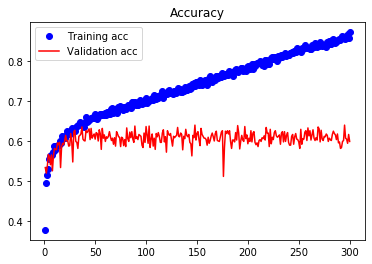

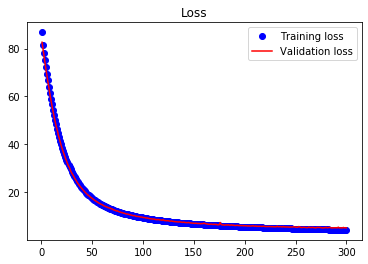

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
 
plt.show()

In [14]:
myvgg.save('VGG16_Aug_4.h5')

In [15]:
X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')

In [16]:
_loss, _acc, _auc, _precision, _recall, _f1score = myvgg.evaluate(X_test, y_test, batch_size=64)
print('loss: {:.3f}, accuracy: {:.3f}, auc: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _auc, _precision, _recall, _f1score))

704/704 [==============================] - 2s 3ms/step
loss: 15.470, accuracy: 0.278, auc: 0.935, precision: 0.278, recall: 0.278, f1score: 0.278


In [17]:
_loss, _acc, _auc, _precision, _recall, _f1score = myvgg.evaluate(X_val, y_val, batch_size=64)
print('loss: {:.3f}, accuracy: {:.3f}, auc: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _auc, _precision, _recall, _f1score))

859/859 [==============================] - 2s 3ms/step
loss: 4.971, accuracy: 0.598, auc: 0.935, precision: 0.602, recall: 0.597, f1score: 0.600
